In [27]:
%reset -f

In [29]:
import pandas as pd
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point, geom_bar, geom_boxplot, geom_hline, facet_grid, labs, geom_point, geom_col, stat_count, geom_histogram, stat_density, coord_flip
from plotnine import scale_x_continuous, scale_y_continuous, scale_colour_discrete, scale_x_reverse, scale_y_reverse, scale_color_manual, scale_color_brewer, scale_x_discrete, scale_fill_manual
from plotnine import theme_xkcd, theme_classic, theme_light, theme, element_blank
from plotnine import geom_text, position_stack

In [59]:
# Leyendo archivo histórico
path = './defuncionciones_generales_historico_filtrado.csv'
df = pd.read_csv(path, encoding = 'latin1')

In [60]:
df.columns

Index(['index', 'tloc_resid', 'tloc_ocurr', 'causa_def', 'sexo', 'edad',
       'anio_ocur', 'ocupacion', 'escolarida', 'sitio_ocur', 'derechohab',
       'area_ur', 'lugar_residencia', 'lugar_ocurrencia'],
      dtype='object')

In [61]:
# Filtrando por años de ocurrencia mayores a 2000
df = df[df.anio_ocur>2010]

In [68]:
class_freq = pd.DataFrame(df.groupby(["anio_ocur"]).size().reset_index())
class_freq.columns = ["anio_ocur", "freq"]
p = (
       ggplot(class_freq) + 
        aes(x="anio_ocur", y="freq", label="freq", fill="anio_ocur") + 
        geom_col() + 
        geom_text(position = position_stack(vjust = 0.5), size=8) +
        #scale_x_discrete(limits=class_freq.sort_values(by="freq")["anio_ocur"].tolist()) +
        scale_fill_manual(values=["#e6eeff", "#6699ff", "#80aaff", "#ccddff", "#b3ccff"]) +    
        coord_flip() +
            labs(x="Año", 
                y="Frecuencia", 
                title="Frecuencia por año de defunción") +
            theme_light() +
            theme(panel_grid_minor_y=element_blank(),
                  panel_grid_major_y=element_blank())
    )

p.save("./myplot.svg")

D:\Anaconda\Anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
D:\Anaconda\Anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ./myplot.svg


TypeError: Continuous value supplied to discrete scale

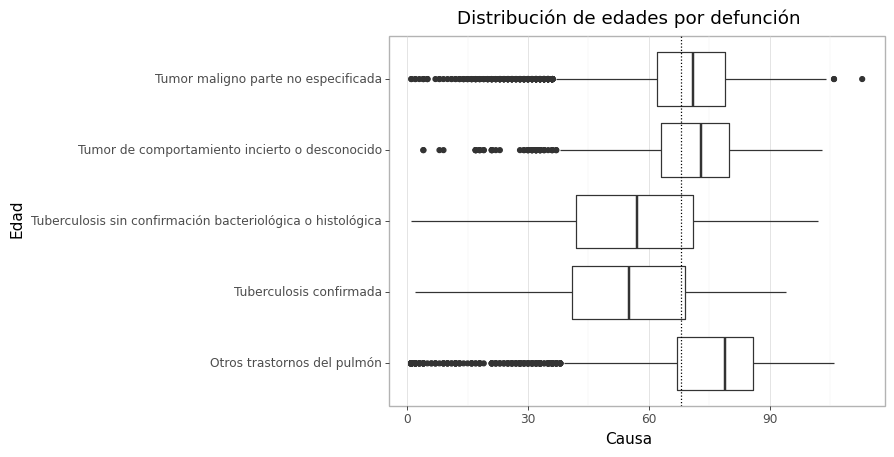

<ggplot: (137799383769)>

In [76]:
mu = df.edad.mean()
(
    ggplot(df) 
    + aes(x="causa_def", y="edad") 
    + geom_boxplot() 
    + geom_hline(yintercept=mu, linetype="dotted")
    + coord_flip() 
    + labs(x="Edad", 
            y="Causa", 
            title="Distribución de edades por defunción") +
        theme_light() +
        theme(panel_grid_minor_y=element_blank(),
              panel_grid_major_y=element_blank())
)

#mu.save("./myplot2.svg")

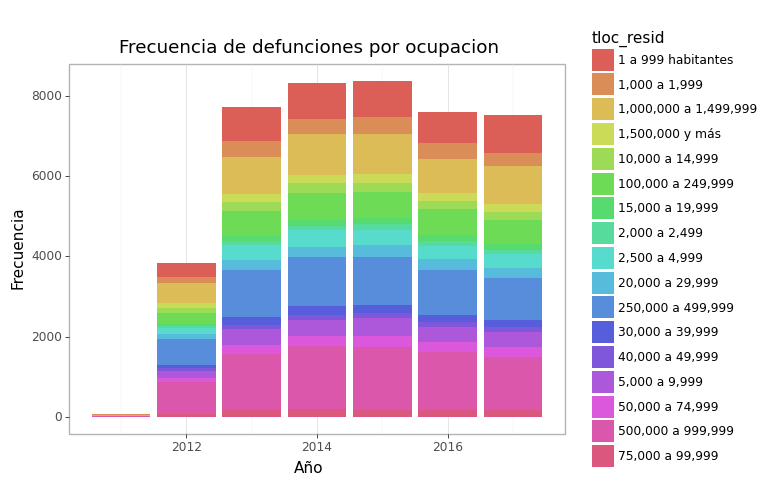

<ggplot: (140826482086)>

In [98]:
p = (
    ggplot(df) 
    + aes(x="anio_ocur", fill="tloc_resid") 
    + geom_bar(stat="count")
    + labs(x="Año", 
            y="Frecuencia", 
            title="Frecuencia de defunciones por ocupacion") +
        theme_light() +
        theme(panel_grid_minor_y=element_blank(),
              panel_grid_major_y=element_blank())
)
#p.save('./tamanio.svg')
p


In [81]:
(
    ggplot(df) 
    + aes(x="anio_ocur", y="escolarida", fill="causa_def")
    + geom_bar()
    + scale_x_reverse()
    + scale_y_reverse()
)

TypeError: Discrete value supplied to continuous scale

In [36]:
ggplot(df) + aes(x="anio_ocur") + stat_density(color="#668cff", fill="#668cff")

MemoryError: Unable to allocate 15.0 GiB for an array with shape (44900, 44900) and data type float64

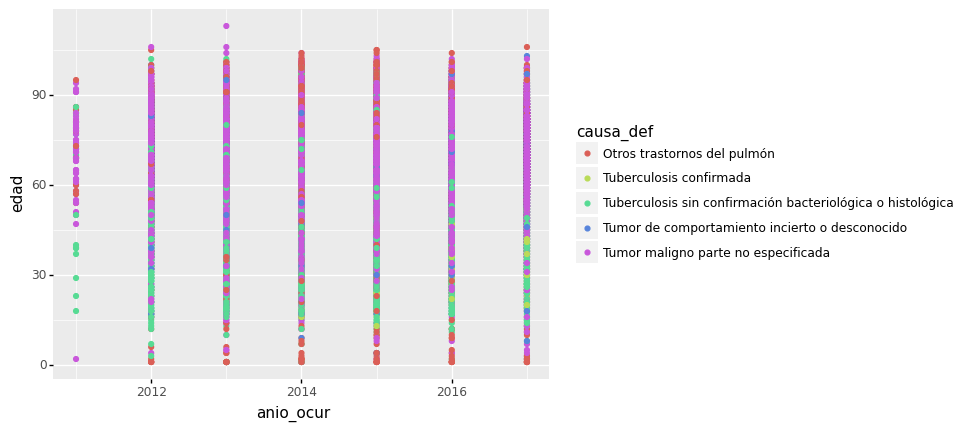

<ggplot: (137799761348)>

In [77]:
(
    ggplot(df) 
    + aes(x="anio_ocur", y="edad", color="causa_def")
    + geom_point()
    + scale_x_continuous() 
    + scale_y_continuous()
    + scale_colour_discrete()
)

In [40]:
p = (
      ggplot(df) + 
        aes(x="anio_ocur", y="freq", label="freq", fill="class") + 
        geom_col() + 
        geom_text(position = position_stack(vjust = 0.5), size=8) +
        scale_x_discrete(limits=class_freq.sort_values(by="freq")["class"].tolist()) +
        scale_fill_manual(values=["#e6eeff", "#6699ff", "#80aaff", "#ccddff", "#b3ccff", "#99bbff", "#4d88ff"], guide=False) +
        coord_flip() +
        labs(x="Clase", 
            y="Frecuencia", 
            title="Frecuencia por clase de vehículo") +
        theme_light() +
        theme(panel_grid_minor_y=element_blank(),
              panel_grid_major_y=element_blank())
    )
p

PlotnineError: 'Valid sequences for specifying \'facets\' look like ["(\'var1\', \'.\')", "(\'var1\', \'var2\')", "(\'.\', \'var1\')", \'((var1, var2), (var3, var4))\']'